In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# data visuzlization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
# max columns
pd.set_option('display.max_columns', None)
# max rows
pd.set_option('display.max_rows', None)

In [4]:
x = pd.read_csv('x1_di.csv')
y = pd.read_csv('y1_di.csv')

In [5]:
x.shape

(98052, 29)

In [6]:
x.head()

,Unnamed: 0,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,1,59,0,0,0,1,0,0,0,9,0,0,18,1,0,0,0,1,0,1,0,0,3,0,1,0,0,0,0
1,2,11,0,0,0,0,0,0,1,6,0,0,13,1,0,0,0,0,0,0,5,2,2,1,0,1,0,0,1
2,3,44,0,0,0,1,0,0,1,7,0,0,16,1,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0
3,4,51,0,0,0,1,0,0,1,5,0,0,8,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,5,31,0,0,0,1,0,0,1,9,0,0,16,1,0,0,0,0,0,1,6,0,3,0,1,0,1,0,1


In [7]:
x = x.drop('Unnamed: 0',axis=1)

In [8]:
x.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,59,0,0,0,1,0,0,0,9,0,0,18,1,0,0,0,1,0,1,0,0,3,0,1,0,0,0,0
1,11,0,0,0,0,0,0,1,6,0,0,13,1,0,0,0,0,0,0,5,2,2,1,0,1,0,0,1
2,44,0,0,0,1,0,0,1,7,0,0,16,1,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0
3,51,0,0,0,1,0,0,1,5,0,0,8,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,31,0,0,0,1,0,0,1,9,0,0,16,1,0,0,0,0,0,1,6,0,3,0,1,0,1,0,1


In [9]:
y.columns

Index(['Unnamed: 0', 'Diabetes'], dtype='object')

In [10]:
y = y.drop('Unnamed: 0',axis=1)
y[:3]

,Diabetes
0,1
1,1
2,1


In [11]:
y = y['Diabetes']

# Logistic Regression

In [12]:
from sklearn.model_selection import  train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48,stratify=y)

In [13]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((68636, 28), (29416, 28), (68636,), (29416,))

In [14]:
from sklearn.preprocessing import  StandardScaler
st = StandardScaler()
Xtrain_t = st.fit_transform(Xtrain)
Xtrain_t=pd.DataFrame(Xtrain_t,columns=x.columns)
Xtrain_t.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,1.314587,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,0.866474,-0.678507,0.813301,-0.226630,-0.14218,2.332501,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,1.553356,-0.293034,1.527613,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
1,-2.136965,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,1.948421,-0.678507,0.813301,-0.226630,-0.14218,-0.013138,0.237815,2.033499,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,1.193721,1.854920,0.551002,-0.377347,-0.923999,3.581835,-1.082538
2,1.060796,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,-0.215472,1.473825,0.266694,4.412485,-0.14218,-0.013138,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,-0.475735,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
3,1.771410,-0.231316,-0.11218,2.920412,0.940735,-0.26051,-0.215472,-0.678507,0.813301,-0.226630,-0.14218,1.097954,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,0.859830,-0.508778,0.551002,2.650077,-0.923999,3.581835,-1.082538
4,1.974442,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,-0.215472,-0.678507,0.813301,-0.226630,-0.14218,0.727590,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,-0.789611,-0.293034,1.193721,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538


In [15]:
Xtest_t = st.transform(Xtest)
Xtest_t=pd.DataFrame(Xtest_t,columns=x.columns)
Xtest_t.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,0.350183,4.323082,-0.11218,-0.342417,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,1.715228,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,2.863178,-0.508778,0.551002,-0.377347,1.082252,3.581835,-1.082538
1,0.603973,-0.231316,-0.11218,-0.342417,0.940735,3.838617,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,2.579410,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,2.139098,-0.293034,1.861504,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
2,0.603973,-0.231316,-0.11218,-0.342417,-1.062998,-0.260510,-0.215472,-0.678507,-0.826521,-0.22663,-0.14218,0.357226,0.237815,2.033499,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,0.967614,-0.293034,-0.141844,-0.508778,0.551002,-0.377347,1.082252,-0.279187,0.923755
3,1.111554,-0.231316,-0.11218,-0.342417,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,0.480681,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,1.193721,-0.508778,0.551002,-0.377347,-0.923999,-0.279187,0.923755
4,1.822168,-0.231316,-0.11218,2.920412,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,1.962137,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,0.967614,-0.293034,3.197069,-0.508778,0.551002,-0.377347,-0.923999,3.581835,-1.082538


In [16]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()

s = []
for i in range(1,101):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(Xtrain_t,ytrain)
  yprob = model.predict_proba(Xtest_t)
  y_prob1=yprob[:,1]
  print(f'n_neighbors = {i} auc score is {roc_auc_score(ytest,y_prob1)}')
  s.append(roc_auc_score(ytest,y_prob1))

n_neighbors = 1 auc score is 0.5692968658769083
n_neighbors = 2 auc score is 0.6045963256944306
n_neighbors = 3 auc score is 0.6248392897827671
n_neighbors = 4 auc score is 0.636254556887964
n_neighbors = 5 auc score is 0.6455454878535967
n_neighbors = 6 auc score is 0.6527553603213109
n_neighbors = 7 auc score is 0.6594556509617001
n_neighbors = 8 auc score is 0.6660830584297127
n_neighbors = 9 auc score is 0.6708377210455518
n_neighbors = 10 auc score is 0.6747837662007055
n_neighbors = 11 auc score is 0.6779954683657157
n_neighbors = 12 auc score is 0.6816677369596301
n_neighbors = 13 auc score is 0.6841795406505795
n_neighbors = 14 auc score is 0.6861162564576816
n_neighbors = 15 auc score is 0.6879429266915361
n_neighbors = 16 auc score is 0.6904658499825527
n_neighbors = 17 auc score is 0.6917038465037033
n_neighbors = 18 auc score is 0.6936996870902119
n_neighbors = 19 auc score is 0.6936277386401168
n_neighbors = 20 auc score is 0.6947892425228491
n_neighbors = 21 auc score is 

In [18]:
np.arange(1,3)

array([1, 2])

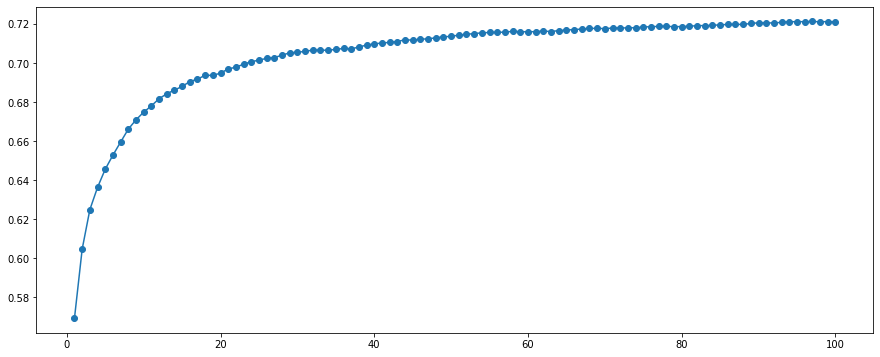

In [19]:
plt.figure(figsize=(15,6))
plt.plot( np.arange(1,101),s,marker='o');

In [20]:
np.max(s)

0.7212679654431446

In [21]:
n = np.argmax(s)+1
n

97

In [22]:
knn =KNeighborsClassifier(n_neighbors=n)
knn.fit(Xtrain_t,ytrain)
ypred = knn.predict(Xtest_t)
ypred1 = knn.predict(Xtrain_t)
yprob = knn.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [23]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.896907,0.103093,0
1,0.917526,0.082474,0
2,0.845361,0.154639,0
3,0.917526,0.082474,0
4,0.896907,0.103093,0


In [24]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

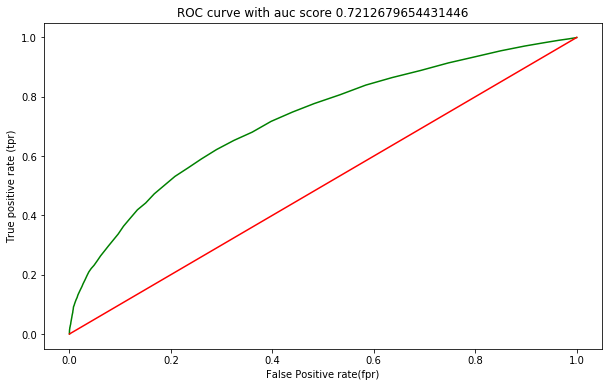

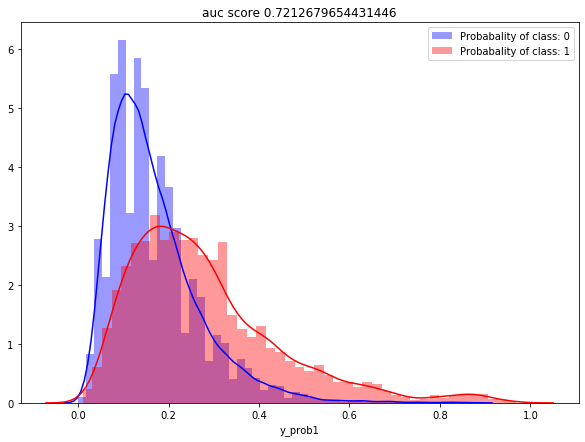

In [25]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     23497
           1       0.71      0.10      0.18      5919

    accuracy                           0.81     29416
   macro avg       0.76      0.55      0.54     29416
weighted avg       0.79      0.81      0.75     29416



In [27]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     54825
           1       0.72      0.10      0.18     13811

    accuracy                           0.81     68636
   macro avg       0.76      0.54      0.53     68636
weighted avg       0.79      0.81      0.75     68636



# Naive base (Gaussian)

In [28]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xtrain_t,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
gnb.fit(Xtrain_t,ytrain)
ypred = gnb.predict(Xtest_t)
ypred1 = gnb.predict(Xtrain_t)
yprob = gnb.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [30]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.999848,0.000152,0
1,0.998972,0.001028,0
2,0.988260,0.011740,0
3,0.992298,0.007702,0
4,0.999748,0.000252,0


In [31]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

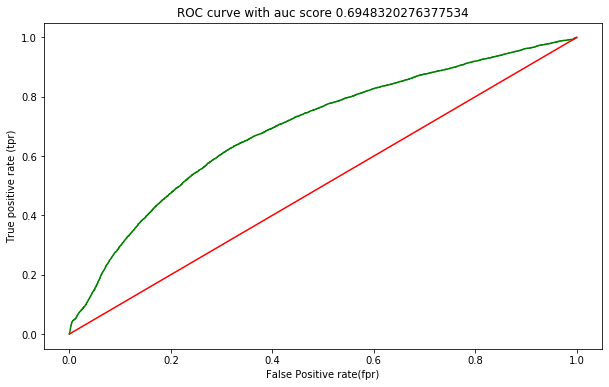

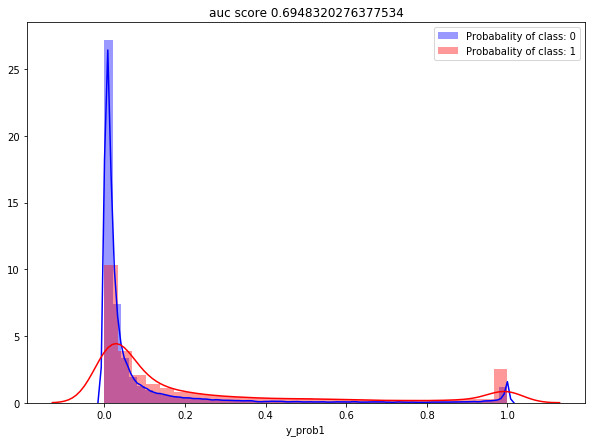

In [32]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     23497
           1       0.44      0.19      0.27      5919

    accuracy                           0.79     29416
   macro avg       0.63      0.57      0.57     29416
weighted avg       0.75      0.79      0.75     29416



In [34]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     54825
           1       0.44      0.18      0.26     13811

    accuracy                           0.79     68636
   macro avg       0.63      0.56      0.57     68636
weighted avg       0.74      0.79      0.75     68636

